The Telco customer churn data contains information about a fictional telco company that provided home phone and Internet services to 5880 customers. It indicates which customers have left, stayed, or signed up for their service. Multiple important demographics are included for each customer, as well as a Satisfaction Score, Churn Score, and Customer Lifetime Value (CLTV) index.

# Import libraries

In [ ]:
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

# Data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Classifier options
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Libraries for evaluating model performance
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn import metrics

#Import Dataset

In [ ]:
df = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/TelecomCustomerChurn.csv')
df

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Monthly,Yes,Manual,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Manual,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Monthly,Yes,Manual,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Monthly,Yes,Manual,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Manual,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No,DSL,Yes,...,No,No,No,No,Monthly,Yes,Manual,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Monthly,Yes,Manual,74.40,306.6,Yes


# Evaluate Columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.describe()

,SeniorCitizen,Tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# Clean the Dataset

In [ ]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Check is there any Null value

In [ ]:
print(df.isnull().sum())

customerID           0
Gender               0
SeniorCitizen        0
Partner              0
Dependents           0
Tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [ ]:
df['TotalCharges'] = df['TotalCharges'].fillna(0)

# Check Target Variable Distribution

In [ ]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


# Label Encode Binary data

In [ ]:
df_tmp = df.copy()

In [ ]:
df_tmp.columns

Index(['customerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
encoders = {}

le_count = 0
for col in df_tmp.columns[1:]:
    if df_tmp[col].dtype == 'object':
        if len(list(df_tmp[col].unique())) <= 2:
            print(col)
            le = LabelEncoder()
            le.fit(df_tmp[col])
            df_tmp[col] = le.transform(df_tmp[col])
            encoders[col] = le
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

Gender
Partner
Dependents
PhoneService
MultipleLines
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
PaperlessBilling
Churn
13 columns were label encoded.


In [ ]:
df

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Monthly,Yes,Manual,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Manual,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Monthly,Yes,Manual,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Monthly,Yes,Manual,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Manual,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No,DSL,Yes,...,No,No,No,No,Monthly,Yes,Manual,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Monthly,Yes,Manual,74.40,306.60,Yes


In [ ]:
df_tmp

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,DSL,0,...,0,0,0,0,Monthly,1,Manual,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Manual,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Monthly,1,Manual,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Monthly,1,Manual,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,1,DSL,1,...,1,1,1,1,One year,1,Manual,84.80,1990.50,0
7039,2234-XADUH,0,0,1,1,72,1,1,Fiber optic,0,...,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,0,0,1,1,11,0,0,DSL,1,...,0,0,0,0,Monthly,1,Manual,29.60,346.45,0
7041,8361-LTMKD,1,1,1,0,4,1,1,Fiber optic,0,...,0,0,0,0,Monthly,1,Manual,74.40,306.60,1


# Exploratory Data Analysis (EDA)

## Plot Histogram of numeric Columns

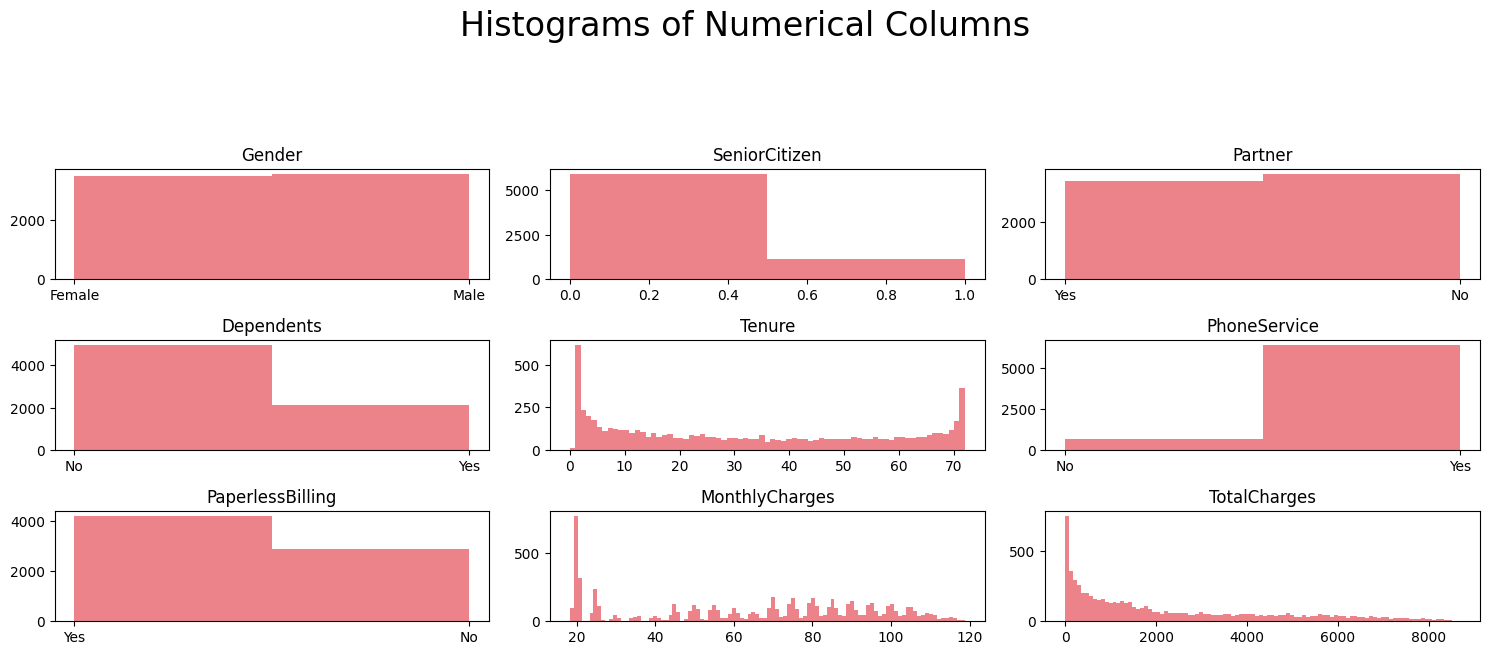

In [ ]:
df2 = df[['Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'PaperlessBilling',
        'MonthlyCharges', 'TotalCharges']]

# Histogram:
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns\n', horizontalalignment = "center", fontstyle = "normal", fontsize = 24, fontfamily = "sans-serif")

for i in range(df2.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(df2.columns.values[i])

    vals = np.size(df2.iloc[:, i].unique())
    if vals >= 100:
        vals = 100

    plt.hist(df2.iloc[:, i], bins=vals, color = '#ec838a')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

## Analyze distribution of Key Categorical Variables

Distribution of Contract Type

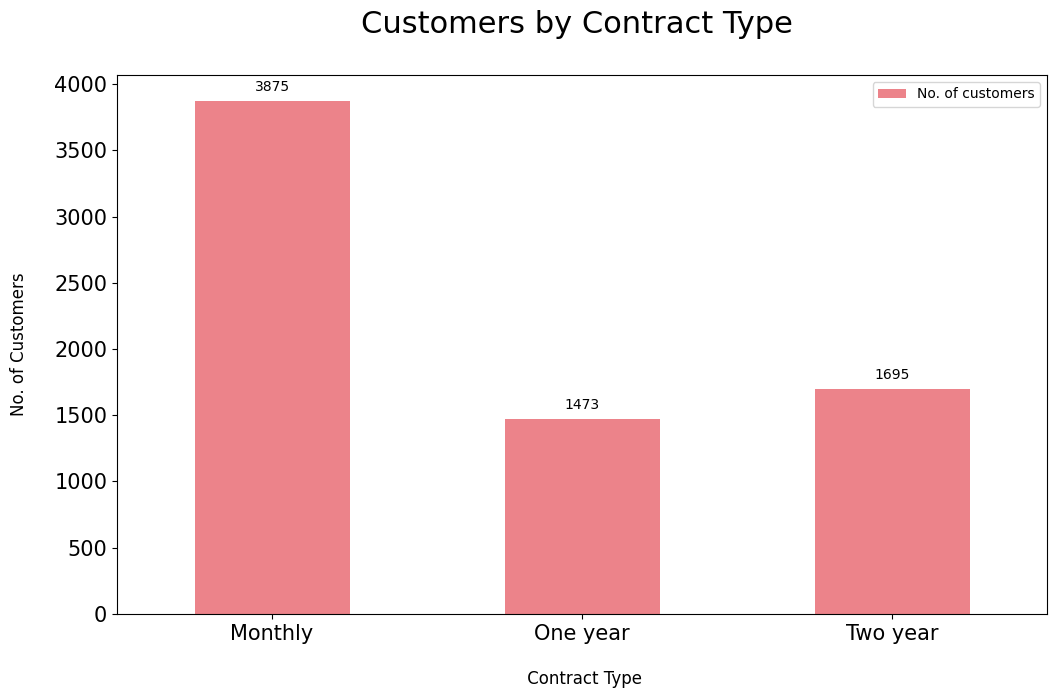

In [ ]:
contract_split = df[["customerID", "Contract"]]
sectors = contract_split.groupby("Contract")
contract_split = pd.DataFrame(sectors["customerID"].count())
contract_split.rename(columns={'customerID': 'No. of customers'}, inplace=True)

ax = contract_split[["No. of customers"]].plot.bar(title = 'Customers by Contract Type', legend =True, table = False, grid = False, subplots = False, figsize = (12, 7), color = '#ec838a', fontsize = 15, stacked = False)

plt.ylabel('No. of Customers\n', horizontalalignment = "center", fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Contract Type', horizontalalignment = "center", fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Customers by Contract Type \n', horizontalalignment = "center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc = 'upper right', fontsize = "medium")
plt.xticks(rotation = 0, horizontalalignment = "center")
plt.yticks(rotation = 0, horizontalalignment = "right")

x_labels = np.array(contract_split[["No. of customers"]])

def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'
        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{:.0f}".format(y_value)
        ax.annotate(
            label,
            (x_value, y_value),
            xytext=(0, space),
            textcoords="offset points",
            ha='center',
            va=va)

add_value_labels(ax)

Distribution of Payment Method Type

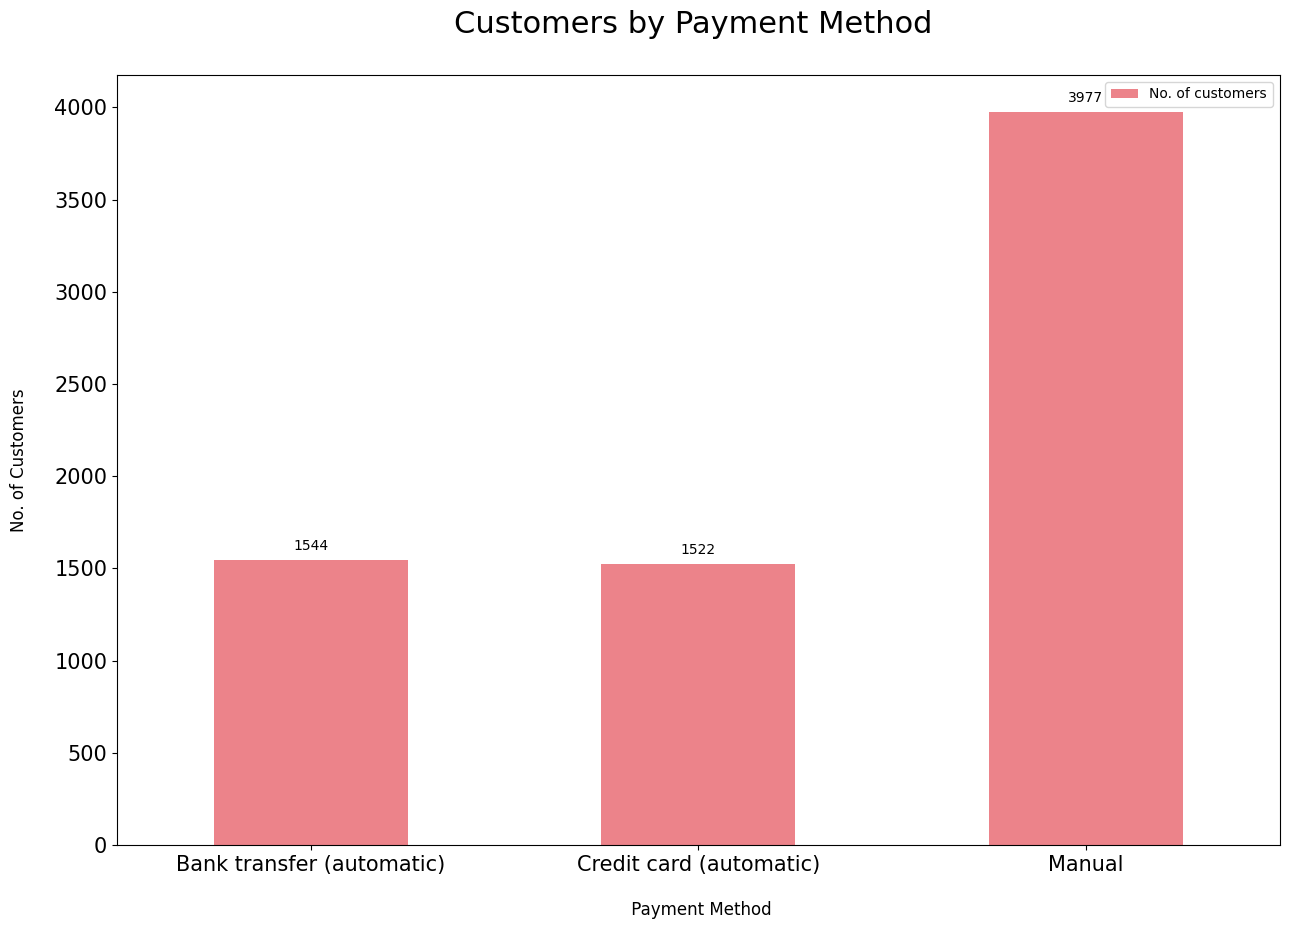

In [ ]:
payment_method_split = df[["customerID", "PaymentMethod"]]
sectors = payment_method_split.groupby("PaymentMethod")
payment_method_split = pd.DataFrame(sectors["customerID"].count())
payment_method_split.rename(columns={'customerID':'No. of customers'}, inplace=True)

ax =  payment_method_split[["No. of customers"]].plot.bar(title = 'Customers by Payment Method', legend =True, table = False, grid = False, subplots = False, figsize =(15, 10), color = '#ec838a', fontsize = 15, stacked = False)

plt.ylabel('No. of Customers\n', horizontalalignment = "center", fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Payment Method', horizontalalignment = "center", fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Customers by Payment Method \n', horizontalalignment = "center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc = 'upper right', fontsize = "medium")
plt.xticks(rotation = 0, horizontalalignment = "center")
plt.yticks(rotation = 0, horizontalalignment = "right")

x_labels = np.array(payment_method_split[["No. of customers"]])

def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'
        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{:.0f}".format(y_value)
        ax.annotate(
            label,
            (x_value, y_value),
            xytext=(0, space),
            textcoords="offset points",
            ha='center',
            va=va)

add_value_labels(ax)

Distribution of various Label Encoded Categorical Variables

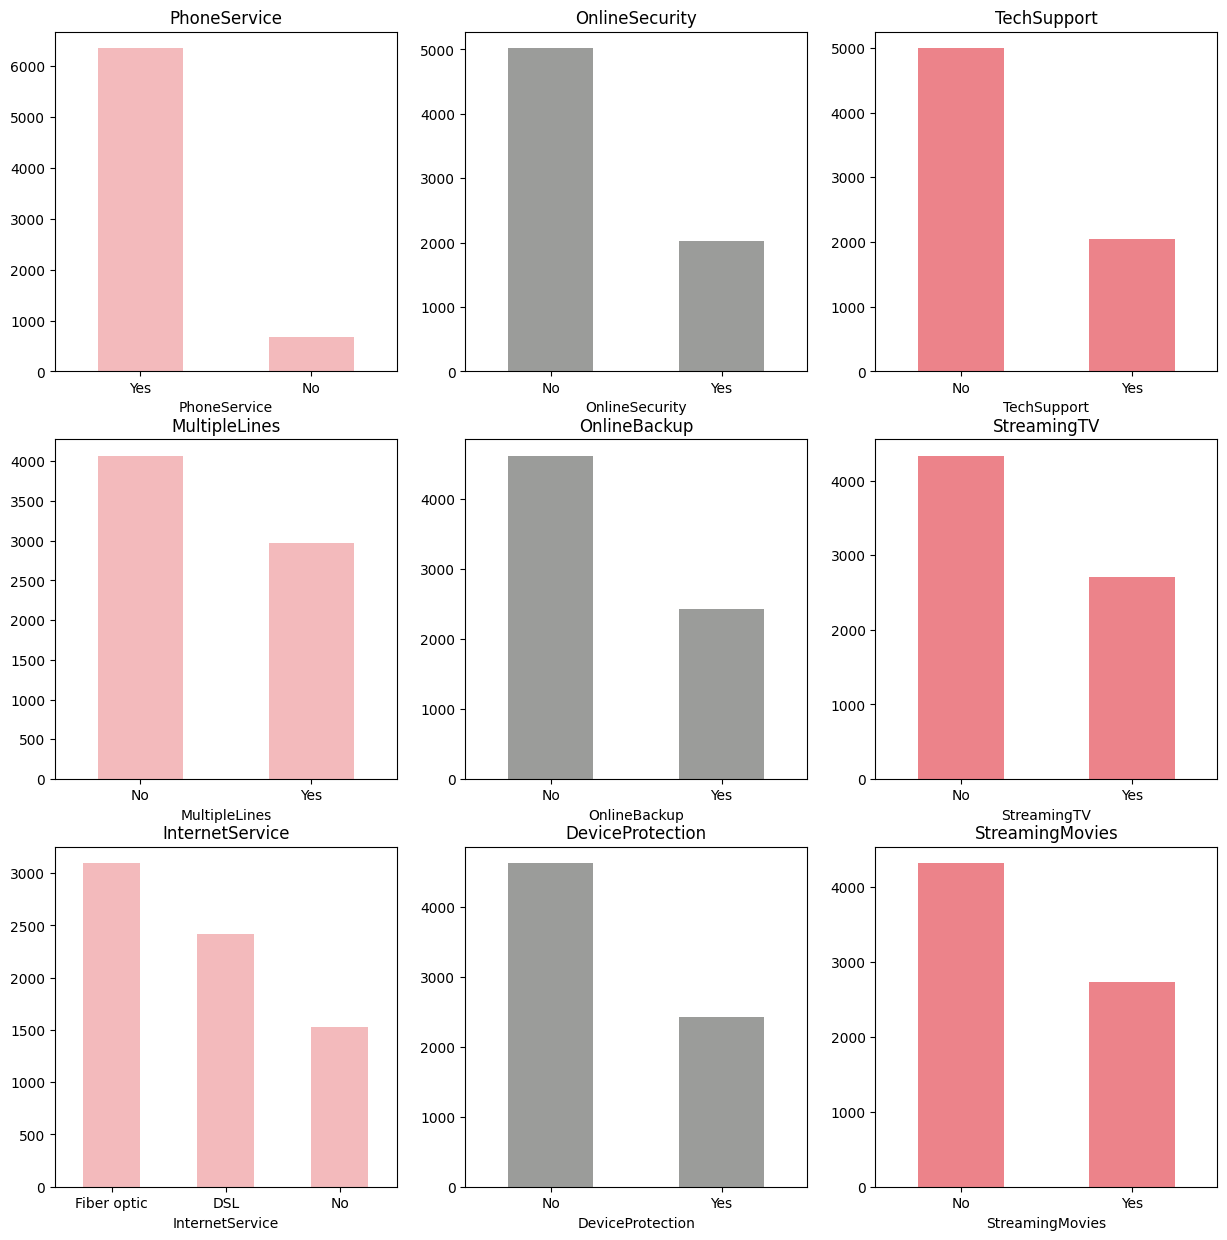

In [ ]:
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,15))
for i, item in enumerate(services):
    if i < 3:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0, color ='#f3babc' )

    elif i >=3 and i < 6:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0,color ='#9b9c9a')

    elif i < 9:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0,color = '#ec838a')

    ax.set_title(item)

## Analyze Churn Rate by Categorical variables

Overall Churn Rate

<ipython-input-271-df3d17f2001a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_rate ["churn_label"] = pd.Series(np.where((churn_rate["Churn"] == 0), "No", "Yes"))


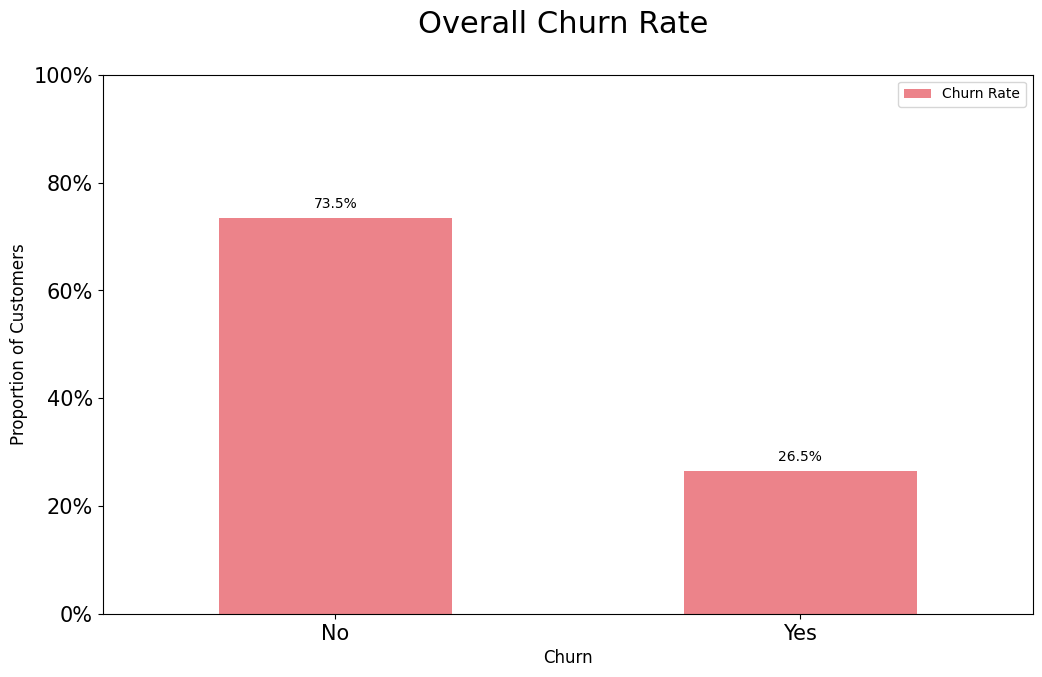

In [ ]:
churn_rate = df_tmp[["Churn", "customerID"]]
churn_rate ["churn_label"] = pd.Series(np.where((churn_rate["Churn"] == 0), "No", "Yes"))
sectors = churn_rate .groupby ("churn_label")
churn_rate = pd.DataFrame(sectors["customerID"].count())
churn_rate ["Churn Rate"] = (churn_rate ["customerID"] / sum(churn_rate ["customerID"]) )*100

ax =  churn_rate[["Churn Rate"]].plot.bar(title = 'Overall Churn Rate', legend =True, table = False, grid = False,  subplots = False,  figsize = (12, 7), color = '#ec838a', fontsize = 15, stacked = False, ylim = (0,100))

plt.ylabel('Proportion of Customers', horizontalalignment = "center", fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Churn', horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Overall Churn Rate \n', horizontalalignment = "center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc = 'upper right', fontsize = "medium")
plt.xticks(rotation = 0, horizontalalignment = "center")
plt.yticks(rotation = 0, horizontalalignment = "right")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
x_labels = np.array(churn_rate[["customerID"]])

def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'
        if y_value < 0:
            space *= -1
            va = 'top'

        label = "{:.1f}%".format(y_value)
        ax.annotate(
            label,
            (x_value, y_value),
            xytext=(0, space),
            textcoords="offset points",
            ha='center',
            va=va)

add_value_labels(ax)
ax.autoscale(enable=False, axis='both', tight=False)

Churn Rate by Contract type

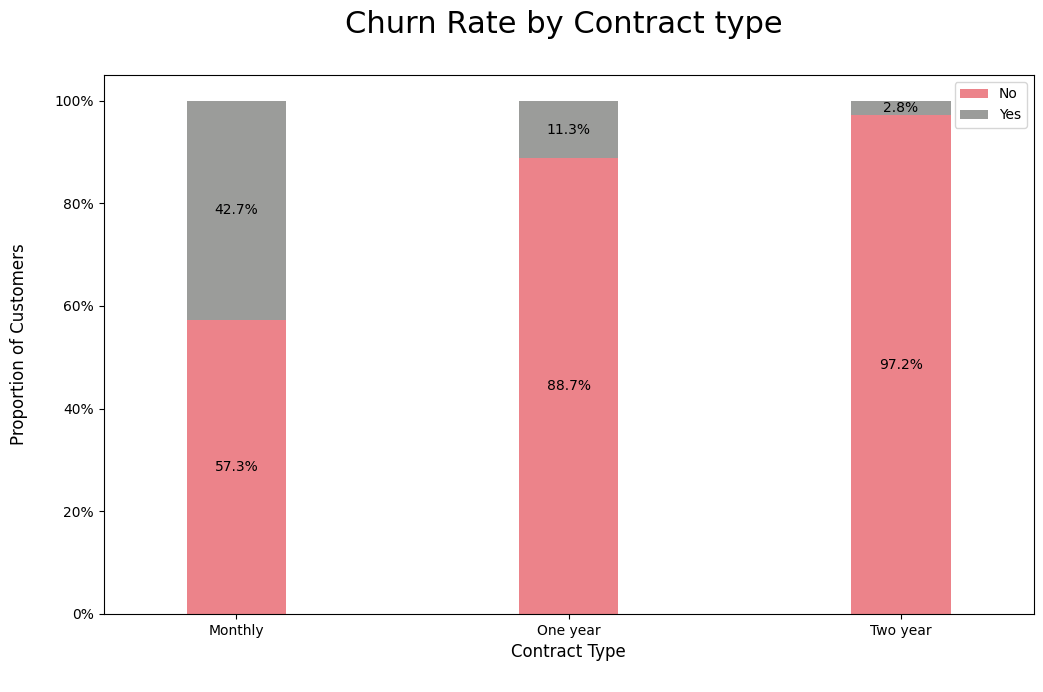

In [ ]:
contract_churn = df.groupby(['Contract','Churn']).size().unstack()

contract_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)

colors  = ['#ec838a','#9b9c9a']

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (12,7),
                                                                color = colors)

plt.ylabel('Proportion of Customers\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Contract Type\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Churn Rate by Contract type \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x+width/2,
            y+height/2,
            '{:.1f}%'.format(height),
            horizontalalignment='center',
            verticalalignment='center')

ax.autoscale(enable=False, axis='both', tight=False)

Churn Rate by Payment Method

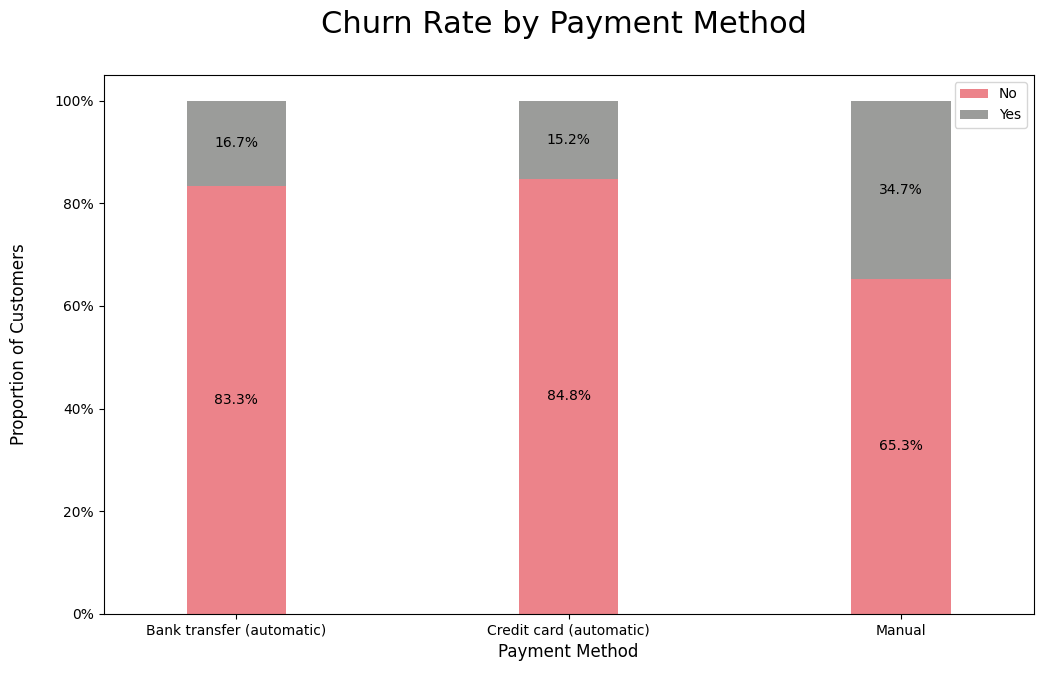

In [ ]:
contract_churn = df.groupby(['PaymentMethod', 'Churn']).size().unstack()

contract_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)

colors  = ['#ec838a','#9b9c9a']

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (12,7),
                                                                color = colors)

plt.ylabel('Proportion of Customers\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Payment Method\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Churn Rate by Payment Method \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x+width/2,
            y+height/2,
            '{:.1f}%'.format(height),
            horizontalalignment='center',
            verticalalignment='center')

ax.autoscale(enable=False, axis='both', tight=False)

# One-Hot Encoding for Remaining Categorical Variabels

In [ ]:
df_tmp

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,DSL,0,...,0,0,0,0,Monthly,1,Manual,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Manual,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Monthly,1,Manual,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Monthly,1,Manual,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,1,DSL,1,...,1,1,1,1,One year,1,Manual,84.80,1990.50,0
7039,2234-XADUH,0,0,1,1,72,1,1,Fiber optic,0,...,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,0,0,1,1,11,0,0,DSL,1,...,0,0,0,0,Monthly,1,Manual,29.60,346.45,0
7041,8361-LTMKD,1,1,1,0,4,1,1,Fiber optic,0,...,0,0,0,0,Monthly,1,Manual,74.40,306.60,1


In [ ]:
identity = df_tmp["customerID"]

df_tmp = df_tmp.drop(columns="customerID")

In [ ]:
df_tmp = pd.get_dummies(df_tmp)
df_tmp

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Monthly,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Manual
0,0,0,1,0,1,0,0,0,1,0,...,0,True,False,False,True,False,False,False,False,True
1,1,0,0,0,34,1,0,1,0,1,...,0,True,False,False,False,True,False,False,False,True
2,1,0,0,0,2,1,0,1,1,0,...,1,True,False,False,True,False,False,False,False,True
3,1,0,0,0,45,0,0,1,0,1,...,0,True,False,False,False,True,False,True,False,False
4,0,0,0,0,2,1,0,0,0,0,...,1,False,True,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,0,1,...,0,True,False,False,False,True,False,False,False,True
7039,0,0,1,1,72,1,1,0,1,1,...,0,False,True,False,False,True,False,False,True,False
7040,0,0,1,1,11,0,0,1,0,0,...,0,True,False,False,True,False,False,False,False,True
7041,1,1,1,0,4,1,1,0,0,0,...,1,False,True,False,True,False,False,False,False,True


Save the one-hot encoding result column for later use

In [ ]:
one_hot_columns = df_tmp.columns

# Heatmap

<Axes: >

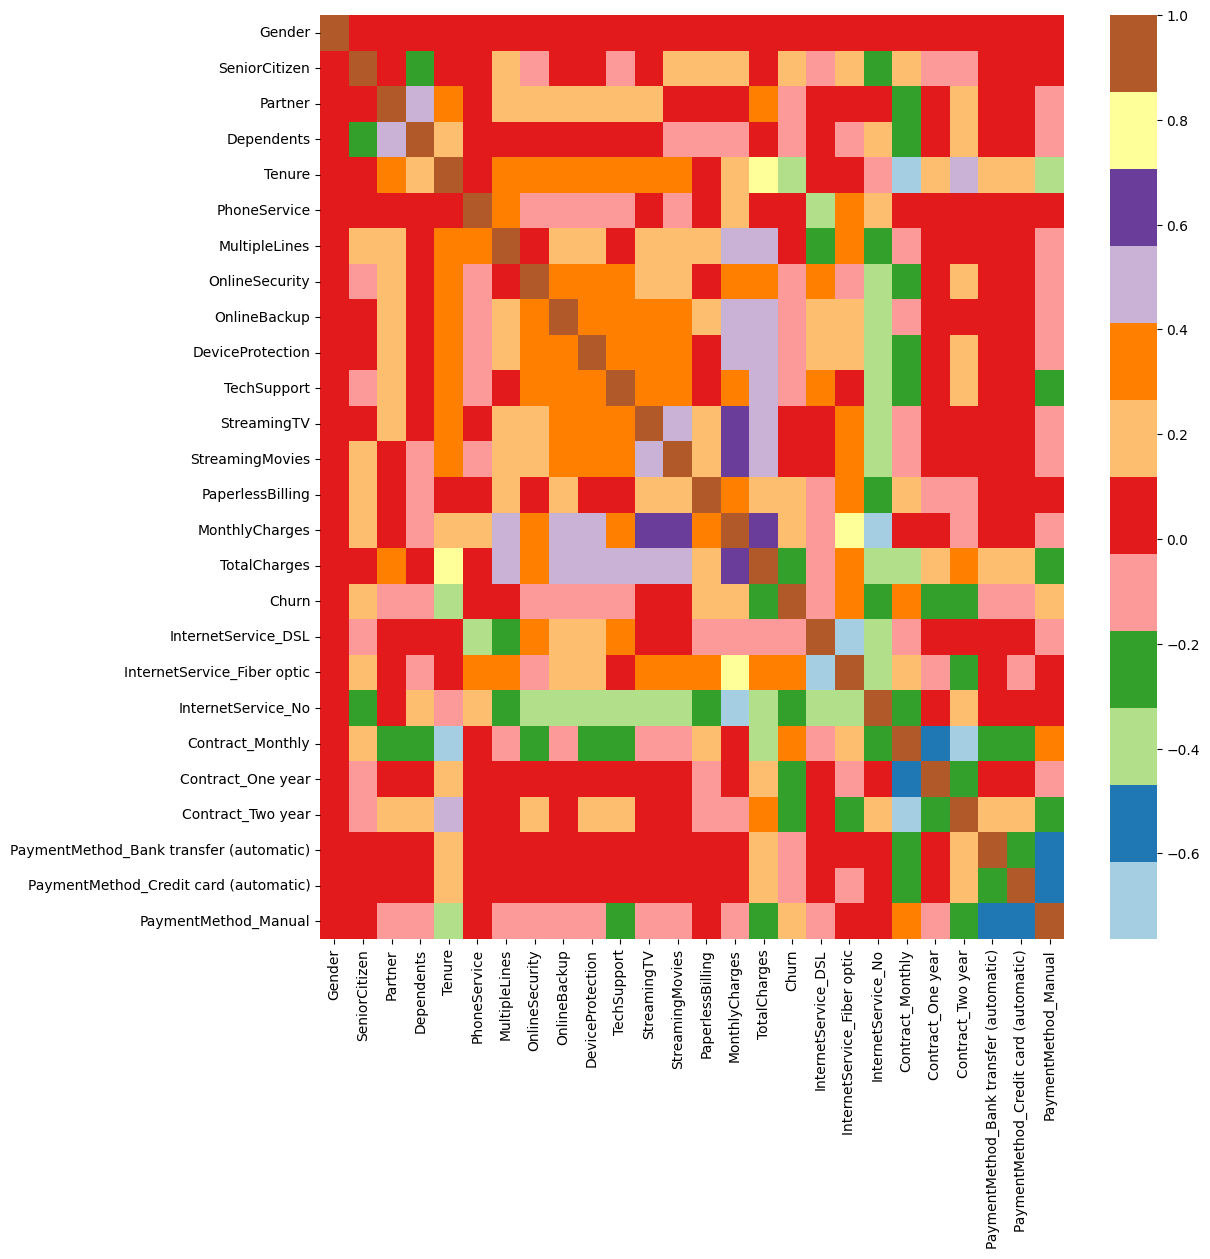

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df_tmp.corr(), cmap="Paired")

# Split Dataset into Dependent (Target) and Independent Variables (Features/Predictors)

Identify target variable

In [ ]:
target = df_tmp["Churn"]
df_tmp = df_tmp.drop(columns="Churn")

# Generate training and test datasets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_tmp, target,
                                                    stratify = target, #ensures the class distribution in the target variable remains balanced
                                                    test_size = 0.2,
                                                    random_state = 0)

In [ ]:
print("Dimension of X_train dataset:", X_train.shape)
print("Dimension of y_train dataset:", y_train.shape)
print("Dimension of X_test dataset:", X_test.shape)
print("Dimension of y_test dataset:", y_test.shape)

Dimension of X_train dataset: (5634, 25)
Dimension of y_train dataset: (5634,)
Dimension of X_test dataset: (1409, 25)
Dimension of y_test dataset: (1409,)


In [ ]:
X_train

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Monthly,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Manual
2499,1,0,0,1,41,1,0,1,1,1,...,2894.55,True,False,False,False,True,False,False,False,True
5807,1,0,0,0,57,1,0,0,0,0,...,1094.35,False,False,True,False,False,True,False,True,False
5118,0,0,1,0,42,1,1,0,0,1,...,3729.75,False,True,False,True,False,False,False,True,False
275,1,0,1,0,5,1,1,0,1,0,...,401.10,False,True,False,True,False,False,False,False,True
1350,0,0,1,0,67,1,1,1,1,1,...,4322.85,True,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1712,0,0,0,0,29,1,1,0,1,0,...,1620.20,True,False,False,False,True,False,False,False,True
1954,1,0,0,0,1,1,1,0,0,0,...,75.45,False,True,False,True,False,False,False,False,True
525,1,0,0,0,52,1,0,1,0,1,...,4738.30,False,True,False,False,True,False,False,False,True
5748,0,0,0,0,21,1,1,0,1,0,...,1992.55,False,True,False,True,False,False,False,True,False


# Feature Scaling

In [ ]:
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2

X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5634 entries, 2499 to 6513
Data columns (total 25 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Gender                                   5634 non-null   float64
 1   SeniorCitizen                            5634 non-null   float64
 2   Partner                                  5634 non-null   float64
 3   Dependents                               5634 non-null   float64
 4   Tenure                                   5634 non-null   float64
 5   PhoneService                             5634 non-null   float64
 6   MultipleLines                            5634 non-null   float64
 7   OnlineSecurity                           5634 non-null   float64
 8   OnlineBackup                             5634 non-null   float64
 9   DeviceProtection                         5634 non-null   float64
 10  TechSupport                              5634 non-

In [ ]:
X_train

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Monthly,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Manual
2499,0.996103,-0.444067,-0.961343,1.545268,0.363266,0.327252,-0.847780,1.573414,1.383161,1.394673,...,0.285152,1.367515,-0.872769,-0.529854,-1.116428,1.958584,-0.559447,-0.525181,-0.530678,0.879098
5807,0.996103,-0.444067,-0.961343,-0.647137,1.016103,0.327252,-0.847780,-0.635561,-0.722982,-0.717014,...,-0.512822,-0.731253,-0.872769,1.887311,-1.116428,-0.510573,1.787480,-0.525181,1.884380,-1.137530
5118,-1.003913,-0.444067,1.040211,-0.647137,0.404069,0.327252,1.179551,-0.635561,-0.722982,1.394673,...,0.655370,-0.731253,1.145778,-0.529854,0.895714,-0.510573,-0.559447,-0.525181,1.884380,-1.137530
275,0.996103,-0.444067,1.040211,-0.647137,-1.105616,0.327252,1.179551,-0.635561,1.383161,-0.717014,...,-0.820119,-0.731253,1.145778,-0.529854,0.895714,-0.510573,-0.559447,-0.525181,-0.530678,0.879098
1350,-1.003913,-0.444067,1.040211,-0.647137,1.424126,0.327252,1.179551,1.573414,1.383161,1.394673,...,0.918274,1.367515,-0.872769,-0.529854,-1.116428,-0.510573,1.787480,-0.525181,-0.530678,0.879098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1712,-1.003913,-0.444067,-0.961343,-0.647137,-0.126361,0.327252,1.179551,-0.635561,1.383161,-0.717014,...,-0.279729,1.367515,-0.872769,-0.529854,-1.116428,1.958584,-0.559447,-0.525181,-0.530678,0.879098
1954,0.996103,-0.444067,-0.961343,-0.647137,-1.268825,0.327252,1.179551,-0.635561,-0.722982,-0.717014,...,-0.964469,-0.731253,1.145778,-0.529854,0.895714,-0.510573,-0.559447,-0.525181,-0.530678,0.879098
525,0.996103,-0.444067,-0.961343,-0.647137,0.812091,0.327252,-0.847780,1.573414,-0.722982,1.394673,...,1.102430,-0.731253,1.145778,-0.529854,-1.116428,1.958584,-0.559447,-0.525181,-0.530678,0.879098
5748,-1.003913,-0.444067,-0.961343,-0.647137,-0.452779,0.327252,1.179551,-0.635561,1.383161,-0.717014,...,-0.114677,-0.731253,1.145778,-0.529854,0.895714,-0.510573,-0.559447,-0.525181,1.884380,-1.137530


In [ ]:
df_tmp.describe()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,64.761692,2279.734304
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,30.090047,2266.794470
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,398.550000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1394.550000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3786.600000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000


In [ ]:
X_train.describe()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Monthly,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Manual
count,5.634000e+03,5.634000e+03,5.634000e+03,5.634000e+03,5.634000e+03,5.634000e+03,5.634000e+03,5.634000e+03,5.634000e+03,5.634000e+03,...,5.634000e+03,5.634000e+03,5.634000e+03,5.634000e+03,5.634000e+03,5.634000e+03,5.634000e+03,5.634000e+03,5.634000e+03,5.634000e+03
mean,1.437733e-16,3.657391e-17,-3.279040e-17,8.702068e-17,-1.387286e-16,6.936431e-17,-5.612203e-17,-7.819249e-17,1.639520e-17,-5.296911e-17,...,-1.765637e-17,6.305846e-19,8.828185e-18,4.666326e-17,6.936431e-17,-1.544932e-17,-1.261169e-18,5.296911e-17,2.017871e-17,3.531274e-17
std,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,...,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00
min,-1.003913e+00,-4.440665e-01,-9.613430e-01,-6.471369e-01,-1.309627e+00,-3.055751e+00,-8.477800e-01,-6.355605e-01,-7.229818e-01,-7.170140e-01,...,-9.979141e-01,-7.312535e-01,-8.727692e-01,-5.298543e-01,-1.116428e+00,-5.105729e-01,-5.594467e-01,-5.251811e-01,-5.306785e-01,-1.137530e+00
25%,-1.003913e+00,-4.440665e-01,-9.613430e-01,-6.471369e-01,-9.832090e-01,3.272518e-01,-8.477800e-01,-6.355605e-01,-7.229818e-01,-7.170140e-01,...,-8.287957e-01,-7.312535e-01,-8.727692e-01,-5.298543e-01,-1.116428e+00,-5.105729e-01,-5.594467e-01,-5.251811e-01,-5.306785e-01,-1.137530e+00
50%,9.961027e-01,-4.440665e-01,-9.613430e-01,-6.471369e-01,-1.263611e-01,3.272518e-01,-8.477800e-01,-6.355605e-01,-7.229818e-01,-7.170140e-01,...,-3.890280e-01,-7.312535e-01,-8.727692e-01,-5.298543e-01,8.957138e-01,-5.105729e-01,-5.594467e-01,-5.251811e-01,-5.306785e-01,8.790979e-01
75%,9.961027e-01,-4.440665e-01,1.040211e+00,1.545268e+00,9.344983e-01,3.272518e-01,1.179551e+00,1.573414e+00,1.383161e+00,1.394673e+00,...,6.537026e-01,1.367515e+00,1.145778e+00,-5.298543e-01,8.957138e-01,-5.105729e-01,-5.594467e-01,-5.251811e-01,-5.306785e-01,8.790979e-01
max,9.961027e-01,2.251915e+00,1.040211e+00,1.545268e+00,1.628137e+00,3.272518e-01,1.179551e+00,1.573414e+00,1.383161e+00,1.394673e+00,...,2.851793e+00,1.367515e+00,1.145778e+00,1.887311e+00,8.957138e-01,1.958584e+00,1.787480e+00,1.904105e+00,1.884380e+00,8.790979e-01


# Supervised Learning Model

## Model Selection

In [ ]:
models = []

models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0,
                                                         class_weight='balanced')))

models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))

models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, criterion = 'entropy', random_state = 0)))

In [ ]:
acc_results = []
auc_results = []
names = []

col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD',
       'Accuracy Mean', 'Accuracy STD']

model_results = pd.DataFrame(columns=col)
i = 0

for name, model in models:
    kfold = model_selection.KFold(n_splits=10)

    cv_acc_results = model_selection.cross_val_score(
        model, X_train, y_train, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(
        model, X_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1

model_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
0,Logistic Regression,84.34,1.55,74.42,1.18
2,Random Forest,82.29,1.88,78.72,0.86
1,Decision Tree Classifier,64.92,2.27,72.38,0.74


Compare Baseline Classification Algorithms - Second Iteration

In [ ]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
roc_auc = roc_auc_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1, f2, roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score', 'ROC-AUC'])

classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
roc_auc = roc_auc_score(y_test, y_pred)

model_results = pd.DataFrame([['Decision Tree', acc, prec, rec, f1, f2, roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score', 'ROC-AUC'])

results = pd.concat([results,model_results], ignore_index = True)

classifier = RandomForestClassifier(n_estimators = 72, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
roc_auc = roc_auc_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest', acc, prec, rec, f1, f2, roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score', 'ROC-AUC'])

results = pd.concat([results,model_results], ignore_index = True)

In [ ]:
results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)

print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score  \
0  Logistic Regression  0.805536   0.655280  0.564171  0.606322  0.580308   
2        Random Forest  0.785664   0.632353  0.459893  0.532508  0.486425   
1        Decision Tree  0.727466   0.486631  0.486631  0.486631  0.486631   

    ROC-AUC  
0  0.728462  
2  0.681637  
1  0.650562  


## Train and Test the Chosen Model

In [ ]:
classifier = LogisticRegression(random_state = 0, penalty = 'l2')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

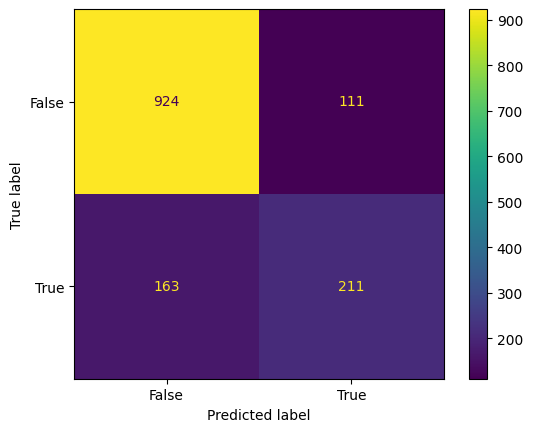

In [ ]:
cm = confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()

In [ ]:
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
roc_auc = roc_auc_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1, f2, roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score', 'ROC AUC '])

print(results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score  \
0  Logistic Regression  0.805536    0.65528  0.564171  0.606322  0.580308   

   ROC AUC   
0  0.728462  


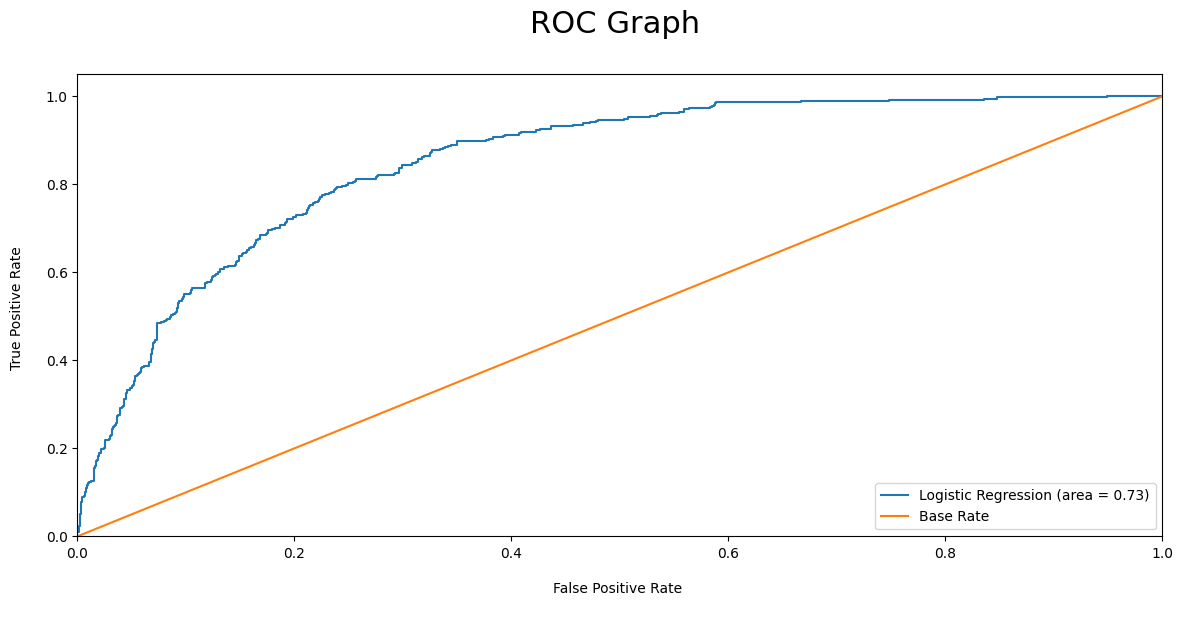

In [ ]:
classifier.fit(X_train, y_train)
probs = classifier.predict_proba(X_test)
probs = probs[:, 1]
classifier_roc_auc = roc_auc_score(y_test, y_pred )

rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))

plt.plot(rf_fpr, rf_tpr, label='Logistic Regression (area = %0.2f)' % classifier_roc_auc)

plt.plot([0,1], [0,1],label='Base Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.ylabel('True Positive Rate \n',horizontalalignment="center",fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.title('ROC Graph \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

plt.show()

## Try predicting new data

With the Logistic Regression model that we have obtained above, give an example of applying the model to predict a new row of customer data. Given a value for each of the original variables, use the model to predict whether the customer will unsubscribe or not.

In [ ]:
new_data = {'customerID': ['7370-BOUSA'],
            'Gender': ['Female'],
            'SeniorCitizen': [1],
            'Partner': ['Yes'],
            'Dependents': ['Yes'],
            'Tenure': [15],
            'PhoneService': ['No'],
            'MultipleLines': [0],
            'InternetService': ['DSL'],
            'OnlineSecurity': [0],
            'OnlineBackup': [1],
            'DeviceProtection': [0],
            'TechSupport': [1],
            'StreamingTV': [1],
            'StreamingMovies': [1],
            'Contract': ['Monthly'],
            'PaperlessBilling': ['Yes'],
            'PaymentMethod': ['Bank transfer (automatic)'],
            'MonthlyCharges': [40.75],
            'TotalCharges': [611.25]
            }

In [ ]:
new_df = pd.DataFrame(new_data)
new_df

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7370-BOUSA,Female,1,Yes,Yes,15,No,0,DSL,0,1,0,1,1,1,Monthly,Yes,Bank transfer (automatic),40.75,611.25


In [ ]:
new_data_tf = new_data.copy()

### Label Encode Binary Data

In [ ]:
new_data_tf['Gender'] = encoders['Gender'].transform(new_df['Gender'])[0]
new_data_tf['Partner'] = encoders['Partner'].transform(new_df['Partner'])[0]
new_data_tf['Dependents'] = encoders['Dependents'].transform(new_df['Dependents'])[0]
new_data_tf['PhoneService'] = encoders['PhoneService'].transform(new_df['PhoneService'])[0]
new_data_tf['PaperlessBilling'] = encoders['PaperlessBilling'].transform(new_df['PaperlessBilling'])[0]

In [ ]:
data_tmp = pd.DataFrame(new_data_tf)
data_tmp

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7370-BOUSA,0,1,1,1,15,0,0,DSL,0,1,0,1,1,1,Monthly,1,Bank transfer (automatic),40.75,611.25


In [ ]:
data_tmp = data_tmp.drop(columns=["customerID"])

In [ ]:
final_data = pd.get_dummies(data_tmp)
final_data

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,Contract_Monthly,PaymentMethod_Bank transfer (automatic)
0,0,1,1,1,15,0,0,0,1,0,1,1,1,1,40.75,611.25,True,True,True


In [ ]:
for column in one_hot_columns:
    if column not in final_data.columns:
        final_data[column] = 0

final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Gender                                   1 non-null      int64  
 1   SeniorCitizen                            1 non-null      int64  
 2   Partner                                  1 non-null      int64  
 3   Dependents                               1 non-null      int64  
 4   Tenure                                   1 non-null      int64  
 5   PhoneService                             1 non-null      int64  
 6   MultipleLines                            1 non-null      int64  
 7   OnlineSecurity                           1 non-null      int64  
 8   OnlineBackup                             1 non-null      int64  
 9   DeviceProtection                         1 non-null      int64  
 10  TechSupport                              1 non-null   

In [ ]:
final_data = final_data.drop(columns = "Churn")

In [ ]:
data_scaled = sc_X.transform(final_data.loc[0].values.reshape(1,-1))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
data_scaled

array([[-1.00391252,  2.25191489,  1.04021147,  1.54526803, -0.697593  ,
        -3.05575108, -0.84778   , -0.63556054,  1.38316066, -0.71701402,
         1.60181859,  1.27873885,  1.26203365,  0.83088449, -0.78519281,
        -0.72696559,  1.36751482,  1.14577829,  1.88731113, -1.116428  ,
        -0.51057293, -0.55944674, -0.52518113, -0.53067848, -1.13752975]])

### Predict

In [ ]:
y = classifier.predict(data_scaled)
print(y)

[0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
new_df['Churn'] = y
new_df

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7370-BOUSA,Female,1,Yes,Yes,15,No,0,DSL,0,...,0,1,1,1,Monthly,Yes,Bank transfer (automatic),40.75,611.25,0


# Unsupervised Learning Model

### Evaluating Model

In [ ]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_labels = kmeans.fit_predict(X_train)


dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_train)


cluster_results = pd.DataFrame(columns=[
    'Algorithm', 'Silhouette Score', 'Calinski-Harabasz Score', 'Davies-Bouldin Score'])


def evaluate_clustering(name, labels):

    if len(set(labels)) > 1 and len(set(labels)) < len(X_train):
        silhouette = round(silhouette_score(X_train, labels), 3)
        calinski = round(calinski_harabasz_score(X_train, labels), 2)
        davies = round(davies_bouldin_score(X_train, labels), 2)
    else:
        silhouette = calinski = davies = "Invalid (only one cluster)"
    return [name, silhouette, calinski, davies]


cluster_results.loc[0] = evaluate_clustering("K-Means", kmeans_labels)
cluster_results.loc[1] = evaluate_clustering("DBSCAN", dbscan_labels)

print(cluster_results)

  Algorithm  Silhouette Score  Calinski-Harabasz Score  Davies-Bouldin Score
0   K-Means             0.153                   971.37                  2.09
1    DBSCAN            -0.184                    12.35                  1.09


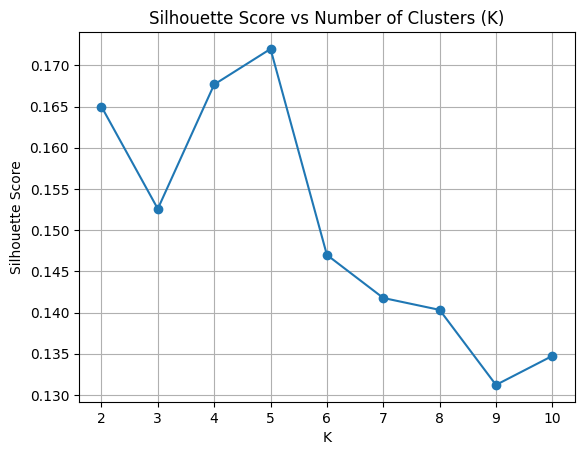

Best K: 5 with Silhouette Score: 0.172


In [ ]:
scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X_train)
    score = silhouette_score(X_train, labels)
    scores.append(score)

plt.plot(K_range, scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters (K)')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


best_k = K_range[scores.index(max(scores))]
print(f"Best K: {best_k} with Silhouette Score: {max(scores):.3f}")

In [ ]:
kmeans = KMeans(n_clusters=best_k, random_state=0)
cluster_labels = kmeans.fit_predict(X_train)

In [ ]:
df_segmentation = df_tmp.iloc[X_train.index].copy()
df_segmentation['cluster'] = cluster_labels


print(df_segmentation['cluster'].value_counts())


cluster_summary = df_segmentation.groupby('cluster').mean(numeric_only=True)
print(cluster_summary)

cluster
1    1656
2    1236
3    1131
0     833
4     778
Name: count, dtype: int64
           Gender  SeniorCitizen   Partner  Dependents     Tenure  \
cluster                                                             
0        0.494598       0.128451  0.747899    0.412965  62.896759   
1        0.501208       0.308575  0.385266    0.153382  20.626208   
2        0.515372       0.034790  0.476537    0.419903  30.196602   
3        0.499558       0.126437  0.331565    0.246684  17.032714   
4        0.493573       0.159383  0.618252    0.343188  48.453728   

         PhoneService  MultipleLines  OnlineSecurity  OnlineBackup  \
cluster                                                              
0            0.887155       0.666267        0.703481      0.734694   
1            1.000000       0.557971        0.161836      0.317633   
2            1.000000       0.224919        0.000000      0.000000   
3            0.647215       0.149425        0.334218      0.304156   
4           

In [ ]:
import pandas as pd

cluster_data = {
    'Feature': [
        'Tenure',
        'MonthlyCharges',
        'TotalCharges',
        'PhoneService',
        'OnlineSecurity',
        'OnlineBackup',
        'DeviceProtection',
        'InternetService_DSL',
        'InternetService_Fiber optic',
        'InternetService_No',
        'Contract_Monthly',
        'Contract_One year',
        'Contract_Two year',
        'PaymentMethod_Manual'
    ],
    'Loyal & Fully Digital Customers': [
        '62.9 months', '≈70', '5512.7', '89%', '70%', '73%', '81%', '56%', '44%', '0%', '6%', '0%', '94%', '23%'
    ],
    'New Digital Users with Low Retention': [
        '20.6 months', '≈70', '1871.4', '100%', '16%', '31%', '31%', '≈0%', '99.9%', '0%', '99.8%', '0.1%', '0.1%', '72%'
    ],
    'Offline & Basic Package Users': [
        '30.2 months', '≈?', '658.9', '100%', '0%', '0%', '0%', '0%', '0.08%', '99.9%', '35%', '23%', '42%', '57%'
    ],
    'Low Commitment DSL Users': [
        '17.0 months', '≈?', '848.6', '65%', '33%', '30%', '24%', '100%', '0%', '0%', '87%', '8.6%', '4%', '68%'
    ],
    'Mid-Term Contract Digital Users': [
        '48.5 months', '≈?', '4136.6', '93%', '50%', '58%', '59%', '46%', '53%', '0%', '0%', '100%', '0%', '41%'
    ]
}

# Buat DataFrame
df_cluster_summary = pd.DataFrame(cluster_data)

# Tampilkan sebagai tabel styled
df_cluster_summary.style.set_caption("📊 Customer Characteristics per Cluster (KMeans – K=5)").set_properties(**{
    'text-align': 'center'
}).set_table_styles([{
    'selector': 'th',
    'props': [('text-align', 'center')]
}])


,Feature,Loyal & Fully Digital Customers,New Digital Users with Low Retention,Offline & Basic Package Users,Low Commitment DSL Users,Mid-Term Contract Digital Users
0,Tenure,62.9 months,20.6 months,30.2 months,17.0 months,48.5 months
1,MonthlyCharges,≈70,≈70,≈?,≈?,≈?
2,TotalCharges,5512.7,1871.4,658.9,848.6,4136.6
3,PhoneService,89%,100%,100%,65%,93%
4,OnlineSecurity,70%,16%,0%,33%,50%
5,OnlineBackup,73%,31%,0%,30%,58%
6,DeviceProtection,81%,31%,0%,24%,59%
7,InternetService_DSL,56%,≈0%,0%,100%,46%
8,InternetService_Fiber optic,44%,99.9%,0.08%,0%,53%
9,InternetService_No,0%,0%,99.9%,0%,0%


| Cluster | Segment Name                        | Key Characteristics                                                      |
|---------|-------------------------------------|---------------------------------------------------------------------------|
| 0       | Loyal & Fully Digital Customers     | Long-term, digitally active, 2-year contract, auto-payment                |
| 1       | New Digital Users with Low Retention| New customers, uses fiber, monthly contract, manual payment, not yet digital |
| 2       | Offline & Basic Package Users       | No internet, basic services only, conservative usage                      |
| 3       | Low Commitment DSL Users            | DSL connection, monthly contract, low cost, partially digital             |
| 4       | Mid-Term Contract Digital Users     | Uses fiber, 1-year contract, digitally engaged, moderately loyal          |


In [ ]:
cluster_map = {
    0: 'Loyal & Fully Digital Customers',
    1: 'New Digital Users with Low Retention',
    2: 'Offline & Basic Package Users',
    3: 'Low Commitment DSL Users',
    4: 'Mid-Term Contract Digital Users'
}

df_segmentation['cluster_label'] = df_segmentation['cluster'].map(cluster_map)



### Identifying Digital vs Traditional Customers

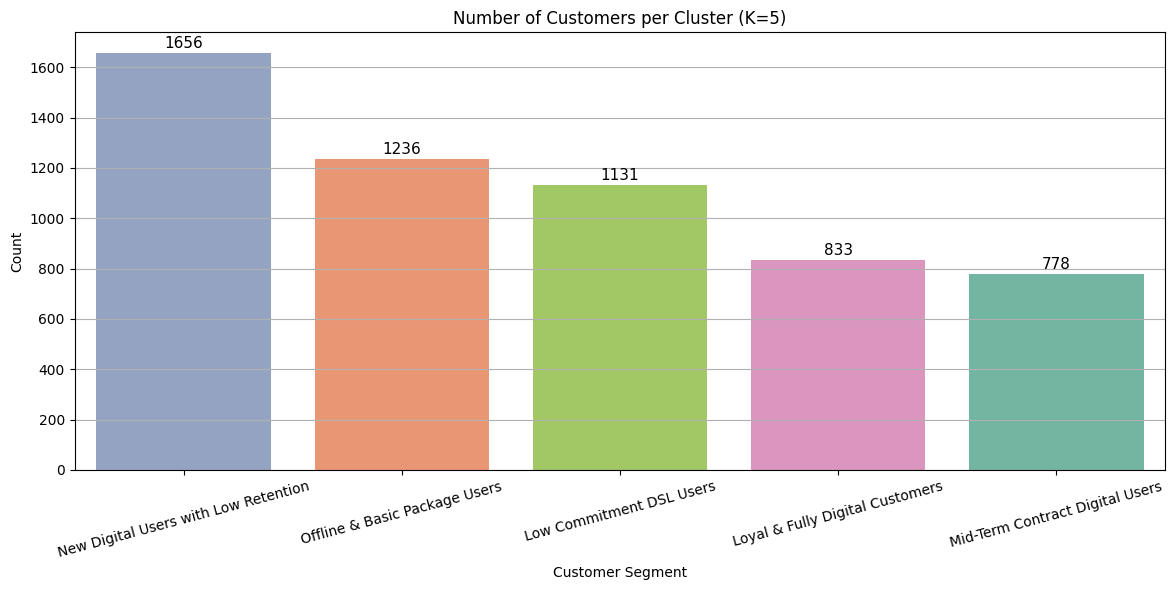

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(
    x='cluster_label',
    data=df_segmentation,
    hue='cluster_label',
    palette='Set2',
    legend=False,
    order=df_segmentation['cluster_label'].value_counts().index
)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 20,
            f'{int(height)}', ha="center", fontsize=11)

plt.title('Number of Customers per Cluster (K=5)')
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.xticks(rotation=15)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Predict cluster labels for the test dataset

In [ ]:
test_cluster_labels = kmeans.predict(X_test)

df_test_segmentation = df_tmp.iloc[X_test.index].copy()
df_test_segmentation['cluster'] = test_cluster_labels

df_test_segmentation['cluster_label'] = df_test_segmentation['cluster'].map({
    0: 'Loyal & Fully Digital Customers',
    1: 'New Digital Users with Low Retention',
    2: 'Offline & Basic Package Users',
    3: 'Low Commitment DSL Users',
    4: 'Mid-Term Contract Digital Users'
})

### Visualize Cluster Distribution on Test Data

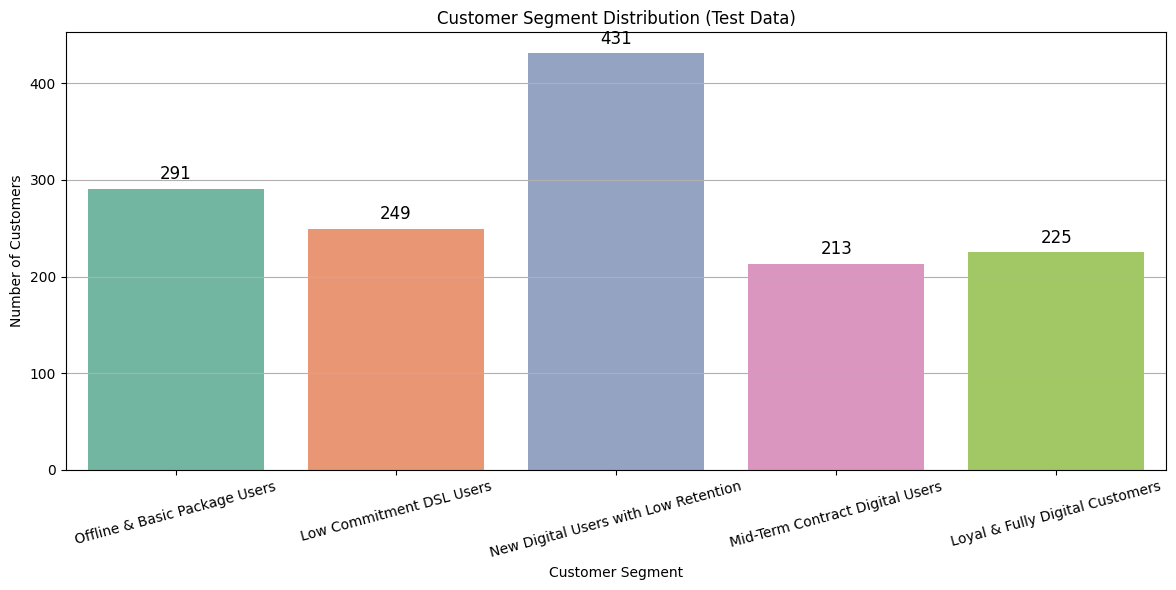

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

x = sns.countplot(
    x='cluster_label',
    hue='cluster_label',
    data=df_test_segmentation,
    palette='Set2',
    legend=False
)

for p in x.patches:
    height = p.get_height()
    x.text(p.get_x() + p.get_width()/2., height + 10, f'{int(height)}', ha='center', fontsize=12)

plt.title('Customer Segment Distribution (Test Data)')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=15)
plt.grid(axis='y')
plt.tight_layout()
plt.show()